Missing values per column:
Production Date      0
Customer ID          0
Product              0
Production Volume    0
Production Cost      0
Age                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Production Date    10 non-null     datetime64[ns]
 1   Customer ID        10 non-null     int64         
 2   Product            10 non-null     object        
 3   Production Volume  10 non-null     int64         
 4   Production Cost    10 non-null     int64         
 5   Age                10 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 612.0+ bytes


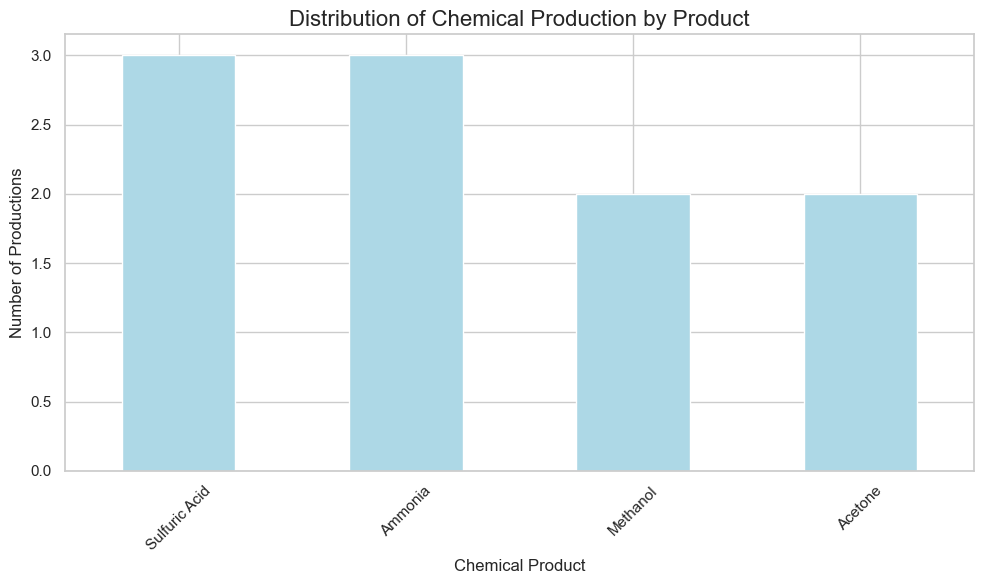

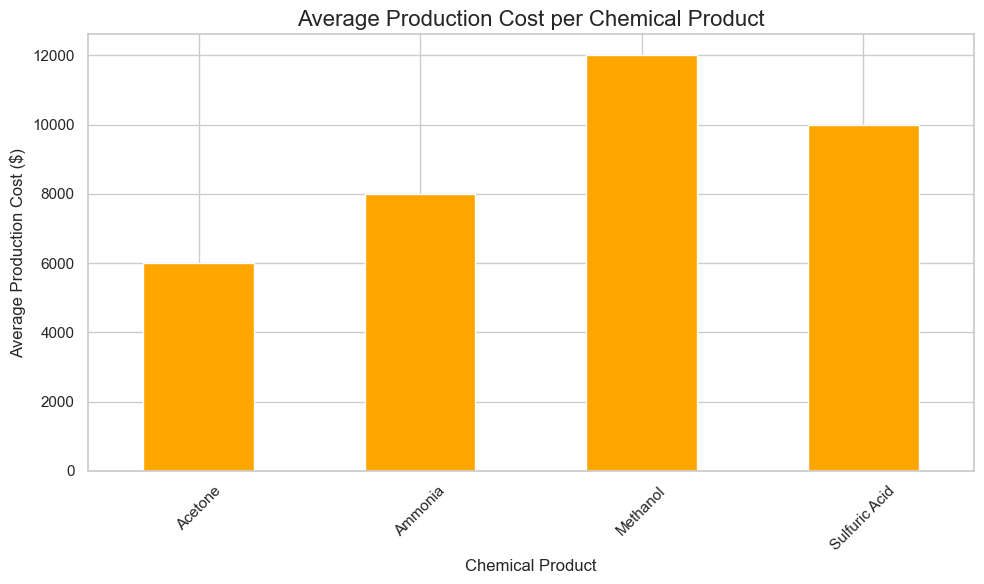

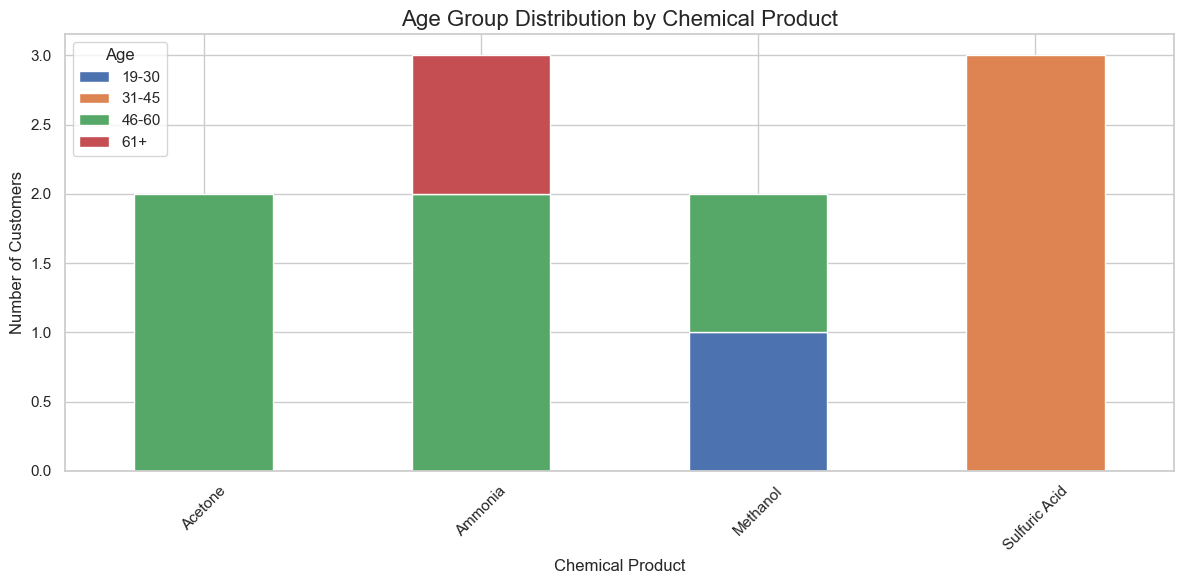

In [2]:
# chemical_production_analysis.ipynb

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

# Step 2: Load the Dataset
file_path = 'chemical_production_data.csv'  # Make sure the file is in the correct directory
data = pd.read_csv(file_path)

# Preview the data
data.head()

# Step 3: Clean the Data
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Convert 'Production Date' to datetime
data['Production Date'] = pd.to_datetime(data['Production Date'])

# Ensure numerical columns are of correct types
data['Production Volume'] = pd.to_numeric(data['Production Volume'], errors='coerce')
data['Production Cost'] = pd.to_numeric(data['Production Cost'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Display cleaned data info
data.info()

# Step 4: Analyze Distribution of Chemical Production by Product
product_counts = data['Product'].value_counts()

# Plot distribution of chemical production by product
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='lightblue')
plt.title("Distribution of Chemical Production by Product", fontsize=16)
plt.ylabel("Number of Productions", fontsize=12)
plt.xlabel("Chemical Product", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Visualize Average Production Cost per Product
avg_production_cost = data.groupby('Product')['Production Cost'].mean()

# Plot average production cost by product
plt.figure(figsize=(10, 6))
avg_production_cost.plot(kind='bar', color='orange')
plt.title("Average Production Cost per Chemical Product", fontsize=16)
plt.ylabel("Average Production Cost ($)", fontsize=12)
plt.xlabel("Chemical Product", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Identify the Most Common Age Groups for Each Chemical Product
age_groups = pd.cut(data['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '61+'])

# Group by product and age group
age_group_distribution = pd.crosstab(data['Product'], age_groups)

# Plot the distribution of age groups for each product
age_group_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Age Group Distribution by Chemical Product", fontsize=16)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlabel("Chemical Product", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
